# Sample 1

In [1]:
import matplotlib
%matplotlib inline

from TM1py import TM1Service

In [2]:
ADDRESS = "localhost"
PORT = 8009
USER = "admin"
PWD = "apple"
SSL = True
tm1 = TM1Service(address=ADDRESS, port=PORT, user=USER, password=PWD, ssl=SSL)

In [3]:
pivot = tm1.cubes.cells.execute_view_dataframe_pivot(
    cube_name="Bike Shares",
    view_name="2017 Counts by Month",
    private=False)

In [4]:
pivot

Values                    
City    Chicago      NYC Washington
Date                               
2017-01  111942   726676     174804
2017-02  166343   791647     226303
2017-03  153406   727665     245403
2017-04  268662  1315404     365990
2017-05  345988  1523268     339677
2017-06  505164  1731594     398751
2017-07  565142  1735599     397680
2017-08  557639  1816498     402534
2017-09  485489  1878098     391371
2017-10  354104  1897592     384833
2017-11  189739  1330649     252534
2017-12  125396   889967     177897

In [5]:
pivot.corr()

Values                     
City                Chicago       NYC Washington
       City                                     
Values Chicago     1.000000  0.892110   0.916156
       NYC         0.892110  1.000000   0.920426
       Washington  0.916156  0.920426   1.000000

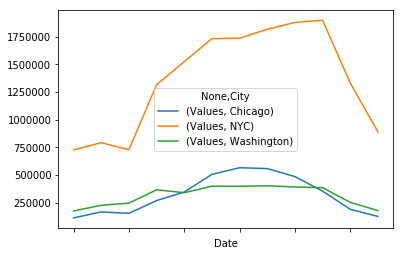

In [6]:
pivot.plot()

In [7]:
stats = pivot.describe()
stats

Values                             
City         Chicago           NYC     Washington
count      12.000000  1.200000e+01      12.000000
mean   319084.500000  1.363721e+06  313148.083333
std    173779.905944  4.689661e+05   90681.471883
min    111942.000000  7.266760e+05  174804.000000
25%    163108.750000  8.653870e+05  240628.000000
50%    307325.000000  1.426958e+06  352833.500000
75%    490407.750000  1.755824e+06  392948.250000
max    565142.000000  1.897592e+06  402534.000000

In [8]:
stats.to_csv("stats.csv", sep=";")

# Sample 2

In [9]:
process_name = "Bedrock.Server.Wait"

with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PWD, ssl=SSL) as tm1:
    success, state, error_log_file = tm1.processes.execute_with_return(
        process_name=process_name, 
        pWaitSec="1")

In [10]:
process_name = "Bedrock.Server.wait"

with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PWD, ssl=SSL) as tm1:
    response = tm1.processes.execute_with_return(process_name=process_name, pWaitSec="m")
    print(response)

(False, 'HasMinorErrors', 'TM1ProcessError_20190424094543_65308772_Bedrock.Server.Wait.log')


In [13]:
with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PWD, ssl=SSL) as tm1:
    error = tm1.processes.get_error_log_file_content('TM1ProcessError_20190424094543_65308772_Bedrock.Server.Wait.log')
    print(error)

ï»¿Error: Prolog procedure line (42):  Errors occurred during execution of process "}bedrock.server.wait".  Check error log file for that process for more details



# Sample 3

In [14]:
with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PWD, ssl=SSL) as tm1:
    threads = tm1.monitoring.get_threads()

In [15]:
for thread in threads:
    if thread["State"] == "Idle":
        print(thread["Name"])

Pseudo
DynamicConfig
